### 4ая Практическая работа. Компьютерный статистический анализ данных

Датасет - Компьютерная томография лёгких. Обнаружение пневмонии. Когда специалисты анализируют снимки, для выявления пневмонии служат белые пятная в лёгких (инфильтраты).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras

Первым делом необходимо ознакомиться с данными. Загрузим по 2 примера каждого вида (нормальные лёгкие, с пневмонией). 

In [3]:
X = []
image = keras.preprocessing.image.load_img('chest_xray/train/NORMAL/IM-0125-0001.jpeg',
                                           grayscale=True, color_mode = 'grayscale', target_size = (128,128))
X.append(keras.preprocessing.image.img_to_array(image))

image = keras.preprocessing.image.load_img('chest_xray/train/NORMAL/IM-0180-0001.jpeg',
                                           grayscale=True, color_mode = 'grayscale', target_size = (128,128))
X.append(keras.preprocessing.image.img_to_array(image))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [4]:
image = keras.preprocessing.image.load_img('chest_xray/train/PNEUMONIA/person1005_virus_1688.jpeg',
                                           color_mode = "grayscale", target_size = (128,128))
X.append(keras.preprocessing.image.img_to_array(image))

image = keras.preprocessing.image.load_img('chest_xray/train/PNEUMONIA/person1018_virus_1706.jpeg',
                                          color_mode = "grayscale", target_size = (128,128))
X.append(keras.preprocessing.image.img_to_array(image))

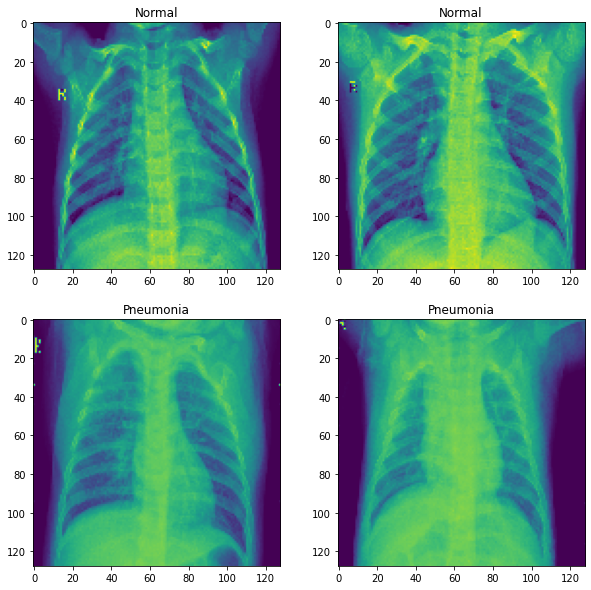

In [5]:
fig = plt.figure(figsize = (10,10))
for i in range(4):
    plt.subplot(220+i+1)
    plt.imshow (X[i])
    if i < 2 :
        plt.title('Normal')
    else :
        plt.title('Pneumonia')

Разница заметна. У людей с пневомнией в легких больше этих "белых" пятен

Загружаем данные. В подробности врачей нам вдаваться не нужно. Наша задача слегка поленивее, сделать CNN

In [6]:
train_path = 'chest_xray/train/'
test_path  = 'chest_xray/test/'
val_path  = 'chest_xray/val/'

In [7]:
import os
def give_set (path):
    X = []
    y = []
    for label in os.listdir(path) :
        for img in os.listdir(path+label+'/') :
            image = keras.preprocessing.image.load_img(path+label+'/'+img, color_mode = 'grayscale', target_size = (128,128))
            X.append(keras.preprocessing.image.img_to_array(image))
            y.append(1 if label == 'PNEUMONIA' else 0)
    X = np.array(X, dtype = float)
    y = np.array(y)
    return X, y

In [8]:
trainX, trainY = give_set(train_path)
valX, valY = give_set(val_path)
testX, testY = give_set(test_path)

Данные загружены. Проверим значения пикселей на снимках

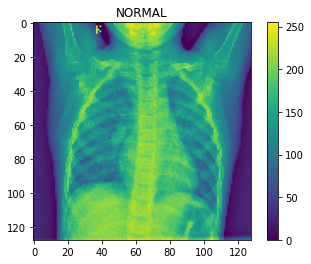

In [9]:
plt.figure()
plt.imshow(trainX[0])
plt.colorbar()
plt.grid(False)
if trainY[0] == 1:
    plt.title('PNEUMONIA')
else:
    plt.title('NORMAL')
plt.show()

Как можем видеть, здесь значения пикселей варьируются от 0 до 255. На вход CNN сеть такое воспринимать не будет. Нормализуем от 0 до 1

In [10]:
trainX = trainX / 255.0
valX = valX / 255.0
testX = testX / 255.0

Почти всё сделано, но надо проверить размеры наших данных.

In [11]:
print("Размер trainX = " + str(trainX.shape))
print("Размер valX = " + str(valX.shape))
print("Размер testX = " + str(testX.shape))

Размер trainX = (5216, 128, 128, 1)
Размер valX = (16, 128, 128, 1)
Размер testX = (624, 128, 128, 1)


In [12]:
trainX = trainX[0: 3000]
trainY = trainY[0: 3000]
trainX.shape

(3000, 128, 128, 1)

Подготовительный этап можно считать закрытым🎉

Посмотрим на равномерность распределения снимков по классам

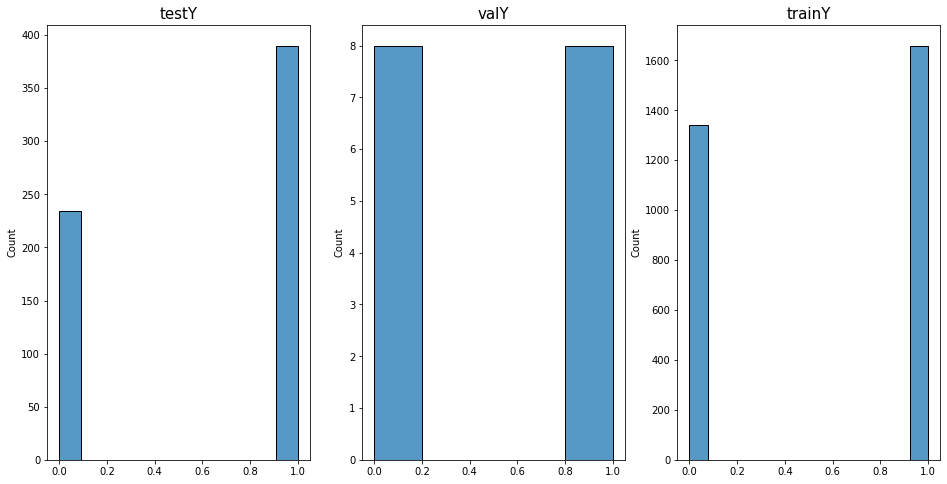

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

sns.histplot(x=testY, ax=axes[0]);
sns.histplot(x=valY, ax=axes[1]);
sns.histplot(x=trainY, ax=axes[2]);

axes[0].set_title('testY',
               fontsize=15)
axes[1].set_title('valY',
               fontsize=15)
axes[2].set_title('trainY',
               fontsize=15)
plt.show()

Можно считать, что данные распределены равномерно по классам. Снимков с пневмнонией примерно столько же сколько и без